First 5 rows:


longitude  latitude  median_house_value
0    -122.23     37.88            452600.0
1    -122.22     37.86            358500.0
2    -122.24     37.85            352100.0
3    -122.25     37.85            341300.0
4    -122.25     37.85            342200.0

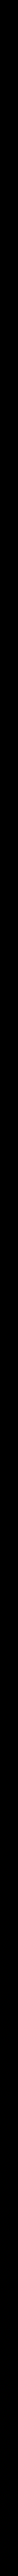

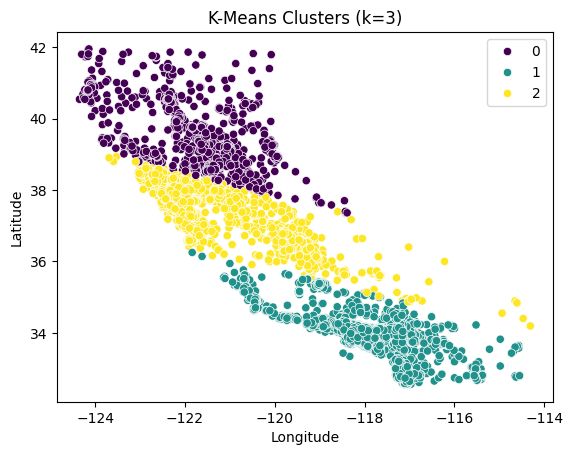

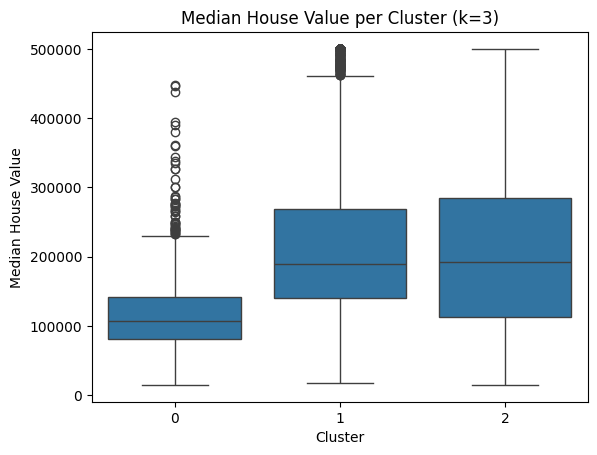

Silhouette Score for k=3: 0.7491


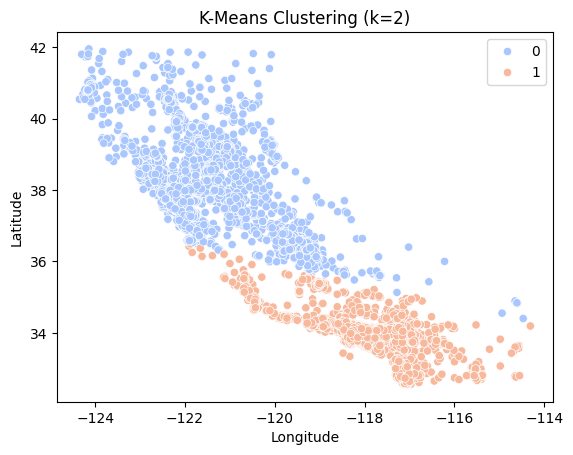

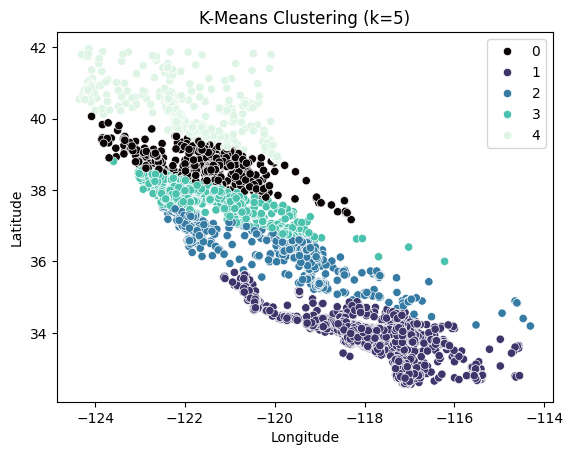

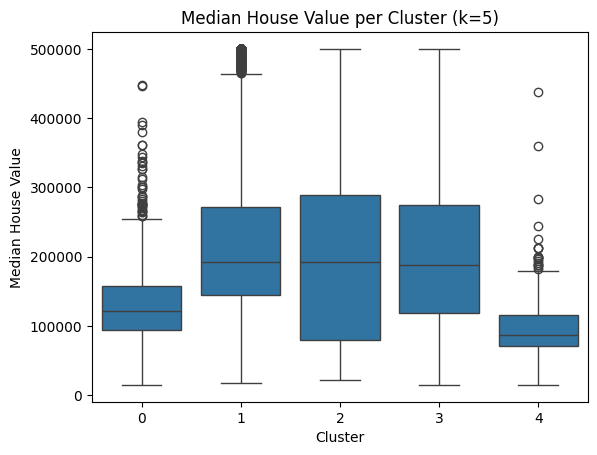

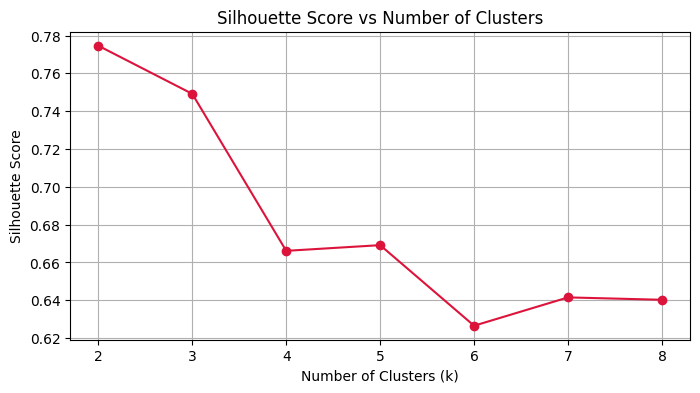

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset (longitude, latitude, median house value)
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
home_data = pd.read_csv(url, usecols=['longitude', 'latitude', 'median_house_value'])
print("First 5 rows:")
display(home_data.head())

# 2. Visualize housing data geographically
sns.scatterplot(
    data=home_data, x='longitude', y='latitude', hue='median_house_value',
    palette='magma', legend='full'
)
plt.title("California Housing Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 3. Train-test split (70% training, 30% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    home_data[['latitude', 'longitude']],
    home_data[['median_house_value']],
    test_size=0.3,
    random_state=0
)

# 4. Normalize data
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

# 5. Apply K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

# 6. Visualize K-Means clusters
sns.scatterplot(
    x=X_train['longitude'], y=X_train['latitude'],
    hue=kmeans.labels_, palette='viridis'
)
plt.title("K-Means Clusters (k=3)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 7. Boxplot showing median house value distribution per cluster
sns.boxplot(x=kmeans.labels_, y=y_train['median_house_value'])
plt.title("Median House Value per Cluster (k=3)")
plt.xlabel("Cluster")
plt.ylabel("Median House Value")
plt.show()

# 8. Evaluate cluster quality using Silhouette Score
from sklearn.metrics import silhouette_score

score = silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')
print(f"Silhouette Score for k=3: {score:.4f}")

# 9. Find the optimal number of clusters using Silhouette Analysis
K = range(2, 9)
fits = []
scores = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X_train_norm)
    fits.append(model)
    scores.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

# 10. Visualize clusters for k=2 and k=5 (examples)
sns.scatterplot(
    data=X_train, x='longitude', y='latitude', hue=fits[0].labels_, palette='coolwarm'
)
plt.title("K-Means Clustering (k=2)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

sns.scatterplot(
    data=X_train, x='longitude', y='latitude', hue=fits[3].labels_, palette='mako'
)
plt.title("K-Means Clustering (k=5)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 11. Boxplot for median house value per cluster (for k=5)
sns.boxplot(x=fits[3].labels_, y=y_train['median_house_value'])
plt.title("Median House Value per Cluster (k=5)")
plt.xlabel("Cluster")
plt.ylabel("Median House Value")
plt.show()

# 12. Display silhouette scores for different k values
plt.figure(figsize=(8, 4))
plt.plot(K, scores, marker='o', color='crimson')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()
